# **Computer Infrastructure - Problems**

### Authored by: Stephen Kerr
---

### **Introduction:**

This notebook contains my submission for the ***Computer Infrastructure*** assessment.  
It address all four required problems: 
1. Downloading recent stock market data for the FAANG companies using the  `yfinance` package (see `yfinance` documentation [here](https://ranaroussi.github.io/yfinance/)),
2. Plotting the closing prices for each stock,
3. Packaging the solution into an executable Python script (`faang.py`), 
4. Configuring GitHub Actions to run the script weekly on a scheule.

The goal is to demonstrate an understanding of Python tooling, data handling, automation and reproducible workflows.

### Imports 

In [1]:
# Imports
import yfinance as yf # importing yfinance to access stock data

import datetime # importing datetime to access dates & times

import os # importing os to handle file paths

import matplotlib.pyplot as plt # importing matplotlib to plot data

import pandas as pd # importing pandas to handle dataframes

import matplotlib.dates as mdates # importing matplotlib.dates to handle date formatting in plots

----
## Problem 1: Downloading Data with yfinance

The first task is to implement a function called `get_data()` that: 
- Dowloads hourly historical data for the previous five days
- For the **FAANG** stocks: Facebook (META), Apple (AAPL), Amazon (AMZN), Netflix (NFLX), Google (GOOG)
- Saves the results in a folder called `data` using a timestamped filename (Format: `YYYYMMDD-HHmmss.csv`)

If no ticker(s) are provided, the function defaults to the FAANG stocks. The function used the `yfinance.download()`, which returns a Pandas Dataframe with a multi-inex column strucutre (e.g., "Close", "AAPL").


### Code for `get_data()`:


In [2]:
# Problem 1 Get data function
# See the yf.download function documentation here - (https://ranaroussi.github.io/yfinance/reference/api/yfinance.download.html)
# used w3b schools page on datetime formatting - (https://www.w3schools.com/python/python_datetime.asp)
# os.path documentation - (https://docs.python.org/3/library/os.path.html#module-os.path)

def get_data(tickers=None, period='5d', interval='1h', save_dir='data'):
    '''
    Download data from yfinance and saves it to a csv file.
    Defaults to FAANG stocks if tickers is not passed.
    Filename Format: 'YYYYMMDD-HHmmss.csv'
    Returns the filepath and dataframe.
    '''
    
    if tickers is None:
        tickers = ['META','AAPL','AMZN','NFLX','GOOG']  # default to FAANG stocks
    
    # download the data
    df = yf.download(tickers=tickers, period=period, interval=interval, auto_adjust=True)

    # save the dataframe to a csv file titled 'YYYYMMDD-HHmmss.csv'
    # in a data folder (note name of file should be the creation date and time)
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    filename = datetime.datetime.now().strftime('%Y%m%d-%H%M%S') + '.csv'
    filepath = os.path.join(save_dir, filename)
    df.to_csv(filepath) # save to csv
    
    return filepath, df 

#### **Example Usage `get_data()`**
Below is an example of using the `get_data()` function coded above. In the example usage the FAANG companies are passed to the function and the data is saved to the `data` directory as a .csv file.   

Note in the next code cell the same due to the deafult configuration being the same as what is passed to `get_data()` the same data is fetch and saved. 

In [3]:
# FAANG using the function
filepath, faang = get_data(['META','AAPL','AMZN','NFLX', 'GOOG']) 
print(f'See file at: {filepath}')
print(faang.head(3))

[*********************100%***********************]  5 of 5 completed

See file at: data/20251211-234348.csv
Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
Datetime                                                                    
2025-12-05 14:30:00+00:00  280.455109  230.938400  322.464996  670.984985   
2025-12-05 15:30:00+00:00  279.295013  229.673996  320.878998  668.650024   
2025-12-05 16:30:00+00:00  278.315002  229.389999  321.850006  673.638000   

Price                                        High                          \
Ticker                           NFLX        AAPL        AMZN        GOOG   
Datetime                                                                    
2025-12-05 14:30:00+00:00  104.665001  281.140015  231.169998  323.829987   
2025-12-05 15:30:00+00:00  100.519997  280.980011  231.240005  322.750000   
2025-12-05 16:30:00+00:00   99.949997  279.329987  229.815002  322.989990   

Price                               

In [4]:
# Default using the function
data_filepath, default_get_data = get_data()

# Note have to specific that I want the dataframe from the returned tuple 
# as the get_data() function returns (filepath, dataframe)
default_get_data.head(3)

[*********************100%***********************]  5 of 5 completed


Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
Datetime                                                                    
2025-12-05 14:30:00+00:00  280.455109  230.938400  322.464996  670.984985   
2025-12-05 15:30:00+00:00  279.295013  229.673996  320.878998  668.650024   
2025-12-05 16:30:00+00:00  278.315002  229.389999  321.850006  673.638000   

Price                                        High                          \
Ticker                           NFLX        AAPL        AMZN        GOOG   
Datetime                                                                    
2025-12-05 14:30:00+00:00  104.665001  281.140015  231.169998  323.829987   
2025-12-05 15:30:00+00:00  100.519997  280.980011  231.240005  322.750000   
2025-12-05 16:30:00+00:00   99.949997  279.329987  229.815002  322.989990   

Price                                              ...        Open  \
Ticker                           META        NFLX  ...        AAPL   
Datetime                                           ...               
2025-12-05 14:30:00+00:00  673.500000  104.730003  ...  280.540009   
2025-12-05 15:30:00+00:00  673.000000  104.790001  ...  280.459991   
2025-12-05 16:30:00+00:00  674.679993  100.720001  ...  279.299988   

Price                                                                      \
Ticker                           AMZN        GOOG        META        NFLX   
Datetime                                                                    
2025-12-05 14:30:00+00:00  230.380005  320.000000  664.500000   98.690002   
2025-12-05 15:30:00+00:00  230.940002  322.489990  670.984985  104.660004   
2025-12-05 16:30:00+00:00  229.649994  320.859985  668.650024  100.500000   

Price                       Volume                                       
Ticker                        AAPL     AMZN     GOOG     META      NFLX  
Datetime                                                                 
2025-12-05 14:30:00+00:00  4393145  4965629  3363481  3614338  29574869  
2025-12-05 15:30:00+00:00  3579247  2554794  1594421  1284282  14309801  
2025-12-05 16:30:00+00:00  2319755  1806782  1103657  2046790  11059580  

[3 rows x 25 columns]

In [5]:
default_get_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35 entries, 2025-12-05 14:30:00+00:00 to 2025-12-11 20:30:00+00:00
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   35 non-null     float64
 1   (Close, AMZN)   35 non-null     float64
 2   (Close, GOOG)   35 non-null     float64
 3   (Close, META)   35 non-null     float64
 4   (Close, NFLX)   35 non-null     float64
 5   (High, AAPL)    35 non-null     float64
 6   (High, AMZN)    35 non-null     float64
 7   (High, GOOG)    35 non-null     float64
 8   (High, META)    35 non-null     float64
 9   (High, NFLX)    35 non-null     float64
 10  (Low, AAPL)     35 non-null     float64
 11  (Low, AMZN)     35 non-null     float64
 12  (Low, GOOG)     35 non-null     float64
 13  (Low, META)     35 non-null     float64
 14  (Low, NFLX)     35 non-null     float64
 15  (Open, AAPL)    35 non-null     float64
 16  (Open, AMZN)    35 non-null     

----
## Problem 2: Plotting the Closing Prices

This task is to write a `plot_data()` function that: 
1. Identifies the most recent CSV file in the `data` directory.
2. Loads the file into a multi-index DataFrame.
3. Extracts the closing prices for each stock.
4. Produces a single plot showing all the closing stock prices series, including lables, legned and date range title.
5. Saves the resulting figure into a `plots` directory, using the filename format `YYYYMMDD-HHmmss.png`.

The function can if required create the `plots` directory and also formats the x-axis using `matplotlib.dates` for clear date representation.

###  Code for `plot_data()`: 


In [6]:
# function plotdata(): plots the Close prices of the stocks in the dataframe
# pasing the filepath to read the csv file back in

def plot_data():
    '''
    Opens the latest data file in the data folder.
    Plots the Close prices of the stocks in the dataframe and saves the plot to a plots folder.
    '''

    # get the latest file in the data folder
    data_dir = 'data'
    files = os.listdir(data_dir) # list all files in the data folder
    files = [f for f in files if f.endswith('.csv')] # only the csv files
             
    if not files:
        raise FileNotFoundError('No data files found in the data folder.')
    
    # get the latest file based on the filename format 'YYYYMMDD-HHmmss.csv'
    latest_file = max(files)

    # construct the full filepath
    filepath = os.path.join(data_dir, latest_file)



    df = pd.read_csv(filepath, header=[0,1], index_col=0, parse_dates=True)
    
    # plot the Close prices
    close_df = df['Close']

    fig, ax = plt.subplots(figsize=(12, 6))


    close_df.plot(ax=ax, linewidth=2)
    
    ax.set_title(f"Close Prices of Stocks {close_df.index.min().strftime('%Y-%m-%d')}"
                 f" to {close_df.index.max().strftime('%Y-%m-%d')}",
              fontsize=16, fontweight='bold', pad=15) 

    ax.set_xlabel('Date', fontsize=14, fontweight='bold')
    ax.set_ylabel('Close Price ($ - USD)', fontsize=14, fontweight='bold')
    
    ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)

    # formating x-axis for better readability using mdates
    ax.xaxis.set_major_locator(mdates.DayLocator())  # Show every 1 day
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))  # "Month Day"

    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)

    plt.tight_layout()


    ax.legend(title='Stocks', loc='best', frameon=True, shadow=True, fontsize=10)

    # save the plot to a plots folder
    plots_dir = 'plots'
    if not os.path.exists(plots_dir):
        os.makedirs(plots_dir)
    plot_filename = datetime.datetime.now().strftime('%Y%m%d-%H%M%S') + '.png'
    plot_filepath = os.path.join(plots_dir, plot_filename)
    plt.savefig(plot_filepath, dpi=300, bbox_inches='tight')
    plt.show()

    return plot_filepath

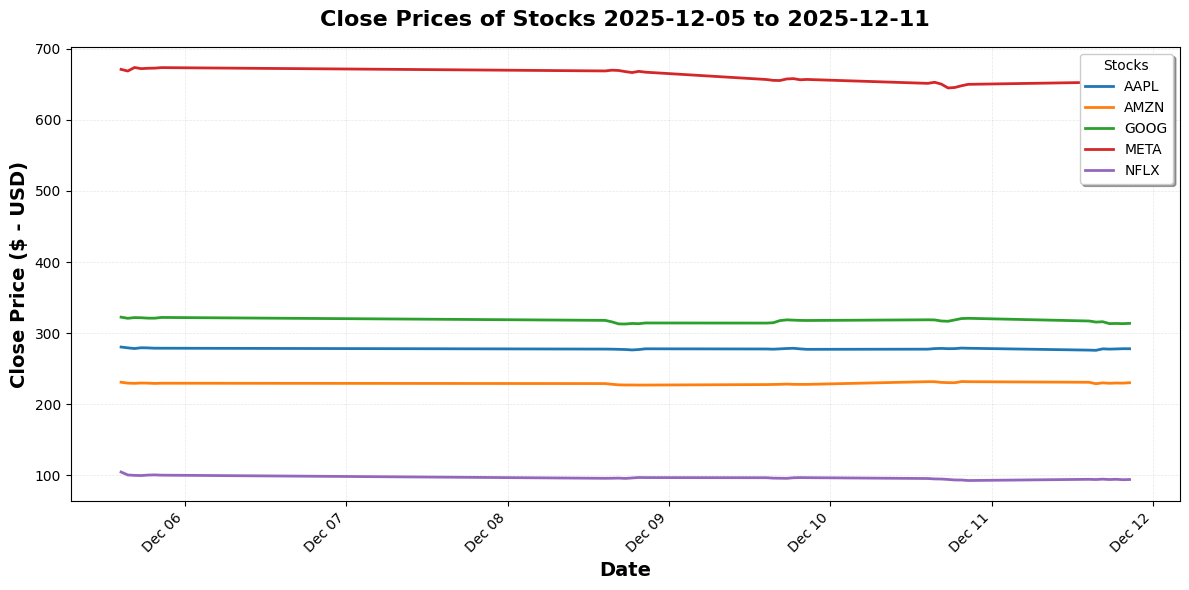

'plots/20251211-234349.png'

In [7]:
# run the plot function
plot_data()

----
## Problem 3: Creating the `faang.py` Script

The next task is to place the `get_data()` and `plot_data()` function into a standalone script called `faang.py` in the root of this repository. 

### Steps taken to create the faang.py
1. Copied the Python Libraries required from the start of this notebook.
    - Specifically, yfinance, datatime, os, matplotlib.pyplot, matplotlib.dates, pandas.
2. Copied the `get_data()` function from this notebook. 
    - Note, didn't make any edits to the function.
3. Copied the `plot_data()` function from this notebook.
    - Note, commeted out the `plt.show()` as this will be run as a script and not interactively.
4. For testing and when the script is triggered added in 'if __name__ == '__main__'.
    - So that if I want to in the future import the functions to other projects I can without having the script running and performing its tasks.
5. Added the shebang line to the top of the script.
    - **'#! /usr/bin/env python'**
6. Changed the permissions on the **'faang.py'** to allow the file to be executed using the following: 
    - `chmod u+x faang.py`

After updating the file permissions, the script ``./faang.py` successfully executed the entire workflow from the terminal.

----
## Problem 4: GitHub Actions Automation

The final task is to create a GitHub Actions workflow (`faang.yml`) located in `.github/workflows/`.


#### My GitHub Action Workflow Explanation: faang.yml

Below is my **faang.yml** file that can be found in the **.github/workflows** folder in this repository. I created this YAML code following the GitHub Action documenation found [here](https://docs.github.com/en/actions/reference/workflows-and-actions/workflow-syntax). 

I will explain each line of code below as an overview it took me 6 failed attempts to manually trigger the workflow before finally on the 7th attempt it worked as expected. Things I had to troubleshoot included an error for trying to import the os python package in my requirements.txt causing an error as it is part of the default pacakges with python. Also, fixing a simple typo in an f-string causing an error. 

As of today 30/11/25 it has successfully run automatically 2 weeks in a row at 8am on Saturday. To see history of ***FAANG Stock Data Collection*** see the log [here](https://github.com/skerr17/computer-infrastructure-assessment/actions).  

---

```yaml
name: FAANG Stock Data Collection

on:
  schedule:
    - cron: '0 8 * * 6'
  workflow_dispatch:

jobs:
  fetch-and-plot:
    runs-on: ubuntu-latest
    
    steps:
    - name: Checkout repository
      uses: actions/checkout@v4
      
    - name: Set up Python
      uses: actions/setup-python@v5
      with:
        python-version: '3.11'
        
    - name: Install dependencies
      run: |
        python -m pip install --upgrade pip
        pip install -r requirements.txt
        
    - name: Run FAANG stock script
      run:  ./faang.py
        
    - name: Commit and push changes
      run: |
        git config --local user.email "github-actions[bot]@users.noreply.github.com"
        git config --local user.name "github-actions[bot]"
        git add data/ plots/
        git diff --quiet && git diff --staged --quiet || git commit -m "Automated FAANG data update - $(date +'%Y-%m-%d')"
        git push
```
---

### Line by Line Explanation of the `faang.yml`


#### Workflow Name:
```yaml
name: FAANG Stock Data Collection
```
#### Explanation: 
```yaml
name: 
``` 
> Defines the display name of the workflow in the 'Actions' tab. It would default to the file name in the repository but I felt it better to assign it a name that was more descriptive : FAANG Stock Data Collection. See the documentation [here](https://docs.github.com/en/actions/reference/workflows-and-actions/workflow-syntax#name).
---

#### Triggers:
```yaml
on:
  schedule:
    - cron: '0 8 * * 6'
  workflow_dispatch:
```
#### Explanation: 
```yaml
on: 
``` 
> Is used to define what triggers the workflow to run, this can be an event or set time. See the specific part of the documentation on the above [here](https://docs.github.com/en/actions/reference/workflows-and-actions/workflow-syntax#on).

```yaml
  schedule:
    - cron: '0 8 * * 6' 
``` 
> This code is used to define the time the workflow will be triggered, using the **cron syntax** (more detail [here](https://docs.github.com/en/actions/reference/workflows-and-actions/workflow-syntax#onschedule). There are 5 fields each representing a unit of UTC time that you can define to specify a time. They go minute, hour, day of the month, month, day of the week. An asterisk `*` is used when a field is not being restricted. The cron above triggers the workflow every time it is the 8th hour (8am UTC) on the 6th day of the week (Saturday). 

```yaml
  workflow_dispatch:
```
> This line enables the manual triggering of the workflow in the GitHub Actions tab. 
---

#### Job & Steps Definition:
```yaml
jobs:
  fetch-and-plot:
    runs-on: ubuntu-latest
    
    steps:
    - name: Checkout repository
      uses: actions/checkout@v4
      
    - name: Set up Python
      uses: actions/setup-python@v5
      with:
        python-version: '3.11'
        
    - name: Install dependencies
      run: |
        python -m pip install --upgrade pip
        pip install -r requirements.txt
        
    - name: Run FAANG stock script
      run:  ./faang.py
        
    - name: Commit and push changes
      run: |
        git config --local user.email "github-actions[bot]@users.noreply.github.com"
        git config --local user.name "github-actions[bot]"
        git add data/ plots/
        git diff --quiet && git diff --staged --quiet || git commit -m "Automated FAANG data update - $(date +'%Y-%m-%d')"
        git push
```
#### Explanation: 
```yaml
jobs:
  fetch-and-plot:
    runs-on: ubuntu-latest 
``` 
> A `job` contains a sequence of tasks or actions that are called `steps`. The steps can run commands, setup, or actions in the repository. In the above snippet we create the `job` that all our task will be performed in, then we give the job a meaningful name `fetch-and-plot`, and finally runs the job on a GitHub hosted Ubuntu virtual machine.

So now we have the `job` name and operating system defined we now need to define the task or `steps` we want to perform.

```yaml
    steps:
    - name: Checkout repository
      uses: actions/checkout@v4 
``` 
> This is the first `step` in our `job` in which we checkout the repository so we can perform edits on it. 

```yaml
    - name: Set up Python
      uses: actions/setup-python@v5
      with:
        python-version: '3.11'
``` 
> The second `step` in our `job` we set up the environment in which the python script will run. 

```yaml
    - name: Install dependencies
      run: |
        python -m pip install --upgrade pip
        pip install -r requirements.txt
``` 
> The third `step` installs the Python dependencies listed in the `requirements.txt`. 

```yaml
    - name: Run FAANG stock script
      run:  ./faang.py
``` 
> The fourth `step` is when we run the `faang.py` script. Which executes the script, which saves updated stock data and plots to the repository. 

```yaml
    - name: Commit and push changes
      run: |
        git config --local user.email "github-actions[bot]@users.noreply.github.com"
        git config --local user.name "github-actions[bot]"
        git add data/ plots/
        git diff --quiet && git diff --staged --quiet || git commit -m "Automated FAANG data update - $(date +'%Y-%m-%d')"
        git push
``` 
> Finally, `git config` is used to configure the GitHub Actions bot, stages the updated files, `git diff` checks the workflow isn't creating an empty commit, `git push` pushes the changes to the repository.
---

## **End**